In [225]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_samples, silhouette_score



/var/folders/2t/3vh0t1gx4ssfv6fklcvfr6bm0000gn/T/ipykernel_57009/118971944.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, data_df], ignore_index=True)


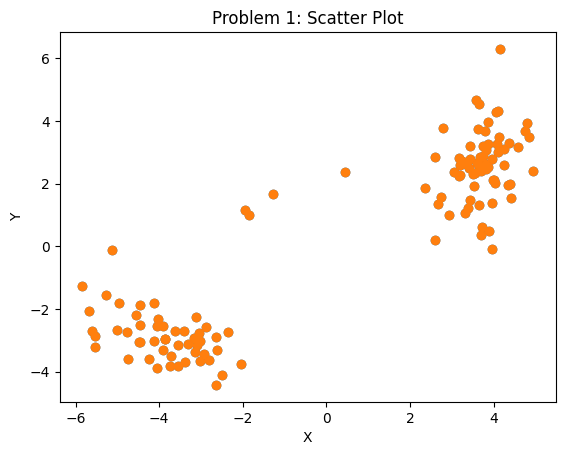

In [226]:
file = 'measurementPoint.csv'
df_csv = pd.read_csv(file)

# Cleaning input data to just get X and Y
df = pd.DataFrame(columns=['X','Y'])
for i in range(len(df_csv)):
    
    data_s = df_csv.iat[i,0].split()
    data_s.pop(0) 
    x,y = float(data_s[0]), float(data_s[1])
    data_df = pd.DataFrame(data=[[x,y]], columns=['X','Y'])
    df = pd.concat([df, data_df], ignore_index=True)

df
plt.scatter(x=df['X'],y=df['Y'])
plt.scatter(x=df['X'], y=df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Problem 1: Scatter Plot')
plt.show()

Visually, 2 clear clusters can be identified. The first being on the lower bottom left, and the second being the cluster in the top right.

The lower left cluster is an elongated oval on a diagonal tilt, with the elongated ends being around (-2,0), and (-6,-1).

The top right cluster is also an elongated oval, but more on a north south tilt, and is less elongated than the other cluster. The north point is around (4,4), and the south point is around (4,0)

([<matplotlib.axis.XTick at 0x3429955d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

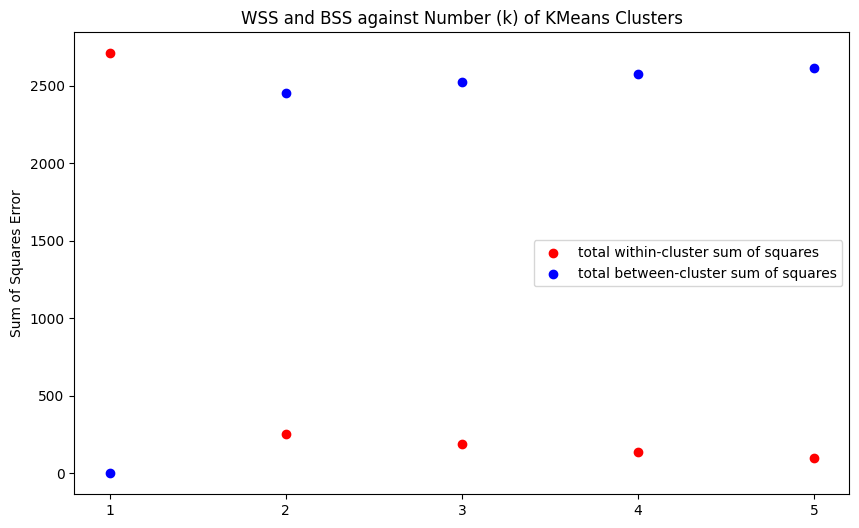

In [227]:
data = df.values.tolist()
within = []
between = []
kmeans_list = []
for k in range(1,6):
    # KMeans uses eucliddean distance by default
    kmeans = KMeans(n_clusters=k,max_iter=100, n_init=100).fit(data)
    kmeans_list.append(kmeans)
    # Get the total within-cluster sum of squares (.interia_)
    WSS = kmeans.inertia_

    # Sum of:(difference between each data point and mean, squared)
    TSS =  np.sum((data - np.mean(data, axis=0)) ** 2)
    
    # Calculate between cluster sum of squares
    BSS = TSS - WSS

    within.append(WSS)
    between.append(BSS)

plt.figure(figsize=(10,6))
plt.scatter(range(1,6), within, color = 'red', label='total within-cluster sum of squares')
plt.scatter(range(1,6), between, color = 'blue', label='total between-cluster sum of squares')
plt.title("WSS and BSS against Number (k) of KMeans Clusters")
plt.legend()
plt.ylabel('Sum of Squares Error')
plt.xticks(range(1,6))




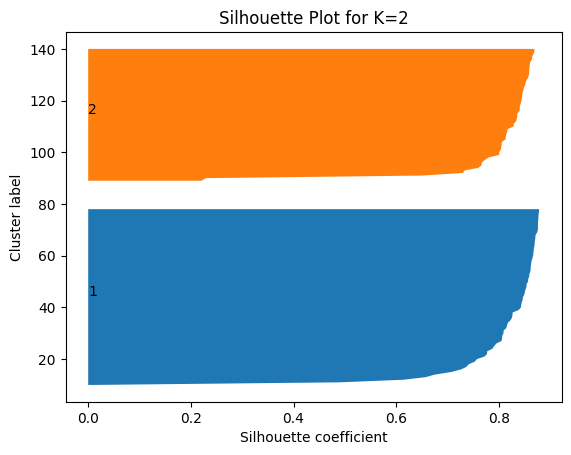

K=2: Average Silhouette Width: 0.81, Minimum Per-Cluster Average: 0.80


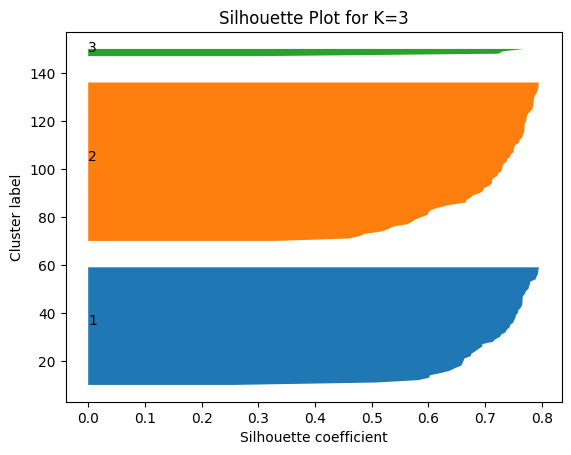

K=3: Average Silhouette Width: 0.70, Minimum Per-Cluster Average: 0.63


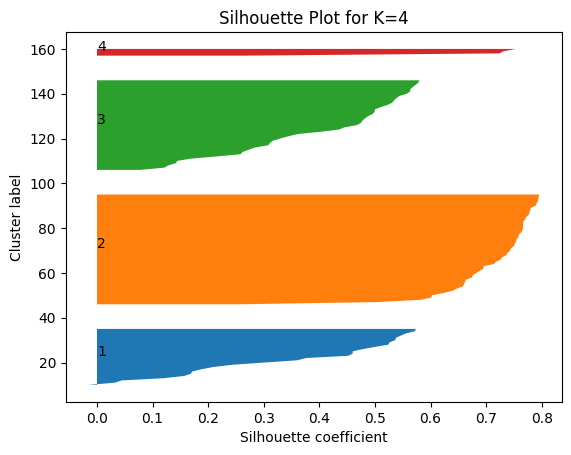

K=4: Average Silhouette Width: 0.52, Minimum Per-Cluster Average: 0.62


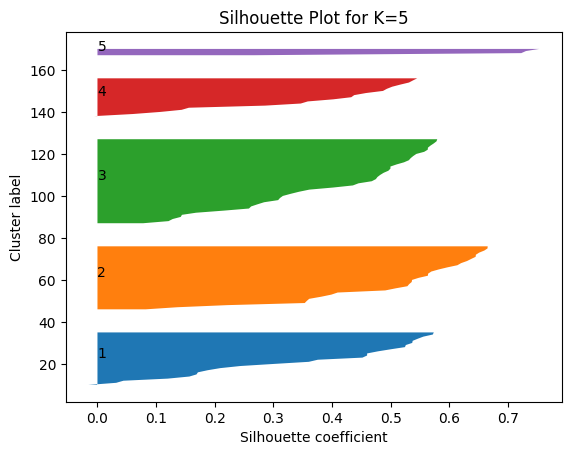

K=5: Average Silhouette Width: 0.42, Minimum Per-Cluster Average: 0.62


In [228]:

"""
Compute the (common) distance matrix for the dataset
Calc: Overall average silhouette width, and minimum per-cluster average silhouette width.  
Produce the silhouette charts for values of K=2,3,4,5
"""

# large amounts of code/inspiration taken from: https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# Computing distance matrix per homework requirement, but was not neccesary for sil. plots
dist_mat = distance_matrix(df[['X', 'Y']], df[['X', 'Y']])

# Function to compute and plot silhouette charts
def plot_silhouette(K_values, df):
    for K in K_values:
        # Fit kmeans model based on number of clusters
        kmeans = KMeans(n_clusters=K,max_iter=100, n_init=100)
        cluster_labels = kmeans.fit_predict(df) # get cluster labels

        # Compute the Silhouette Coefficient for each sample.
        # silhouette coefficient = (b - a) / max(a, b) 
        silhouette_sample_scores = silhouette_samples(df, cluster_labels) 

        # Compute the mean Silhouette Coefficient of all samples (in that cluster)
        silhouette_avg_score = silhouette_score(df, cluster_labels)
        
        # Calculate per-cluster average silhouette width
        per_cluster_silhouette_avg = []
        
        # iterate thru each cluster in current cluster count
        for cluster in range(K): 
            cluster_silhouette_vals = []

            # filter our only cluster labels for specific cluster being worked with
            for i in range(len(silhouette_sample_scores)):
                if cluster_labels[i] == cluster: # check label matches current K
                    cluster_silhouette_vals.append(silhouette_sample_scores[i])  

        # Get per cluster averages for min avg output
        if cluster_silhouette_vals:
            per_cluster_silhouette_avg.append(np.mean(cluster_silhouette_vals))
        else:
            per_cluster_silhouette_avg.append(0)

        min_per_cluster_avg = min(per_cluster_silhouette_avg)

        # Plotting silhouette charts
        fig, ax = plt.subplots()
        y_lower = 10
        # get size of each width for each k
        for i in range(K):
            cluster_silhouette_vals = silhouette_sample_scores[cluster_labels == i]
            cluster_silhouette_vals.sort()
            size = cluster_silhouette_vals.shape[0]
            y_upper = y_lower + size
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
            ax.text(0, y_lower + 0.5 * size, str(i+1))
            y_lower = y_upper + 10 

        ax.set_title(f"Silhouette Plot for K={K}")
        ax.set_xlabel("Silhouette coefficient")
        ax.set_ylabel("Cluster label")
        plt.show()

        print(f"K={K}: Average Silhouette Width: {silhouette_avg_score:.2f}, Minimum Per-Cluster Average: {min_per_cluster_avg:.2f}")

K_list = [2, 3, 4, 5]

# Call the function to compute and plot silhouette charts
plot_silhouette( K_list, df[['X', 'Y']])


Compute the CH Index for each cluster count K=2,...5.  Produce a 2D plot, with the values of K on the horizontal axis, and on the vertical axis plot the LOG10 values of each of the following: total within-cluster sum of squares, the overall average silhouette width, the smallest per-cluster average silhouette width, and the CH index. Please make sure to take the logarithm, use points plot, and provide a legend and labelled axes.

1. total within cluster sum of squares
2. overall average sil. width
3. the smallest per-cluster average sl. width
4. CH index

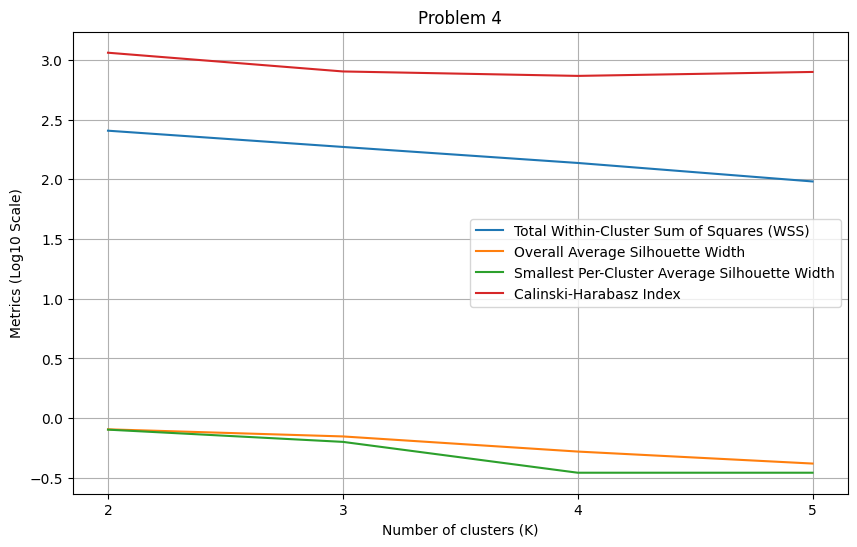

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

# Define K values and initialize lists for metrics
K_values = [2, 3, 4, 5]
WSS_list = []
overall_sil_width = []
min_per_clust_avg_sil_width = []
CH_index = []

for K in K_values:
    # 1. Get total within cluster sum of squares
    kmeans = KMeans(n_clusters=K, max_iter=100, n_init=100)
    kmeans.fit(X)

    # Get the total within-cluster sum of squares (.inertia_)
    WSS_list.append(kmeans.inertia_)

    # 2. Get overall average sil. width
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    overall_sil_width.append(silhouette_avg)

    # 3. the smallest per-cluster average sil. width
    per_cluster_silhouette = []
    silhouette_samples_values = silhouette_samples(X, kmeans.labels_)

    for cluster in range(K):
        cluster_silhouette = silhouette_samples_values[kmeans.labels_ == cluster]
        if len(cluster_silhouette) > 0:
            per_cluster_silhouette.append(cluster_silhouette.mean())
    
    min_per_clust_avg_sil_width.append(min(per_cluster_silhouette))

    # 4. Get CH index
    CH_index.append(calinski_harabasz_score(X, kmeans.labels_))

# Take numpy log10 values of each list
log_WSS = np.log10(WSS_list)
log_avg_sil_width = np.log10(overall_sil_width)
log_min_sil_width = np.log10(min_per_clust_avg_sil_width)
log_CH_index = np.log10(CH_index)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, log_WSS, label='Total Within-Cluster Sum of Squares (WSS)')
plt.plot(K_values, log_avg_sil_width, label='Overall Average Silhouette Width')
plt.plot(K_values, log_min_sil_width, label='Smallest Per-Cluster Average Silhouette Width')
plt.plot(K_values, log_CH_index, label='Calinski-Harabasz Index')

plt.title('Problem 4')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Metrics (Log10 Scale)')
plt.xticks(K_values)
plt.legend()
plt.grid()
plt.show()


5. Based on the within-cluster sum of squares alone, please determine the best cluster count and provide your reasoning.:

Problem 5 answer: Based solely on WCSS, we can see that as K increases, the WCSS error decreases. From only this statistic, it would follow to assume that 5 clusters is the best value, as K=5 has the lowest WCSS error, indicating a best K.

6.) Based on only the three silhouette charts, the average silhouette width and the minimum per-cluster average width, please determine the best cluster count and provide your reasoning.

Problem 6 answer: 

Using the 3 silhouette charts, K=2 and K=3 are clearly dominant candidates over K=4. K=2 has a greater average silhouette width and greater minimum per-cluster average width, and is thus a superior choice to K=3. 

7.) Based on the CH index alone,  please determine the best cluster count and provide your reasoning.


Problem 7 answer:
The highest CH index is when K=2, and is thus the best cluster count on this metric alone.

8.) Using all the information above, provide an estimate of the best cluster count and provide your reasoning.


Problem 8 answer: The CH index and silhouette charts provide the most compelling narrative for selecting a cluster count of 2. 